In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img= cv2.imread('test_images/sharapova1.JPG')
img.shape

(555, 700, 3)

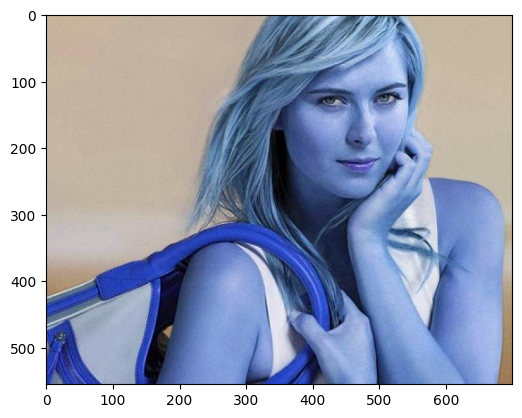

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

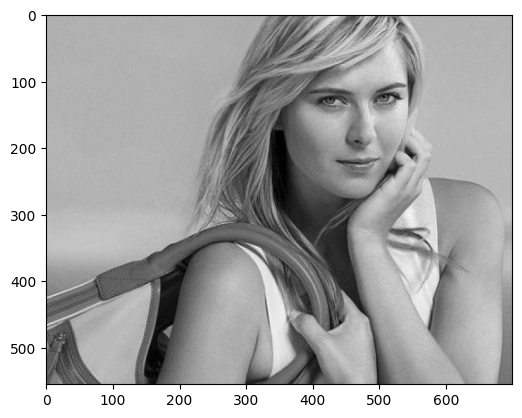

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

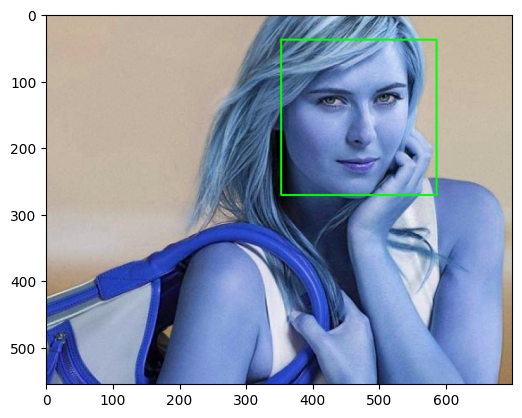

In [9]:
face_img= cv2.rectangle(img,(x,y), (x+w, y+h), (0,255,0),2)
plt.imshow(face_img)

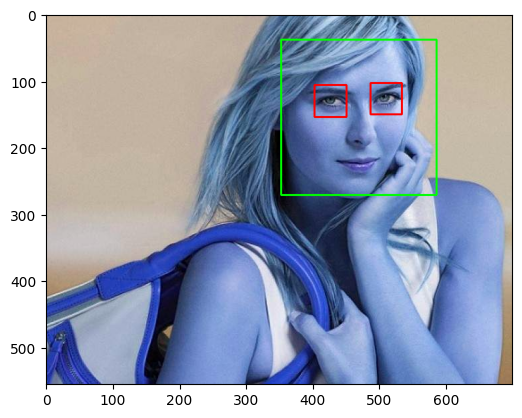

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img= cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
    roi_gray= gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for( ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (255,0,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

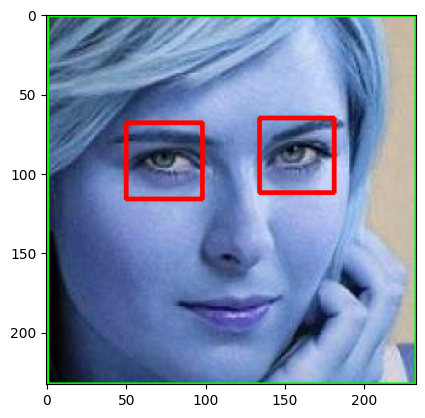

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image(img_path):
    
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color= img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

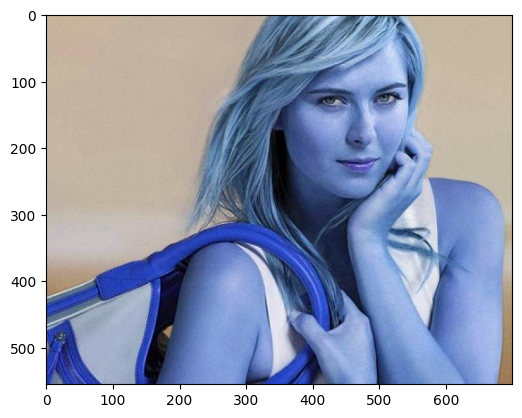

In [13]:
original_image= cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

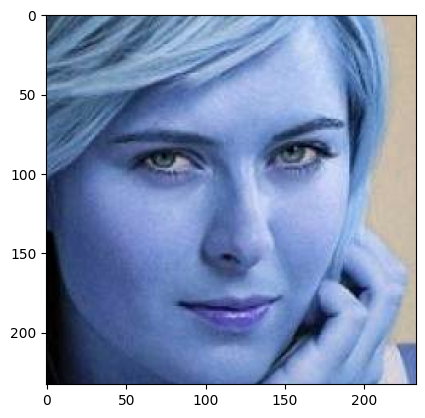

In [14]:
cropped_image = get_cropped_image('./test_images/sharapova1.JPG')
plt.imshow(cropped_image)

In [15]:
path_to_data= "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [16]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs =[]
celebrity_file_name_dict= {}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color= get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in the folders:", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder+ "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

cropped
lionel_messi
Generating cropped images in the folders: ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in the folders: ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in the folders: ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in the folders: ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in the folders: ./dataset/cropped/virat_kohli


In [69]:
import numpy as np 
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray= img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H



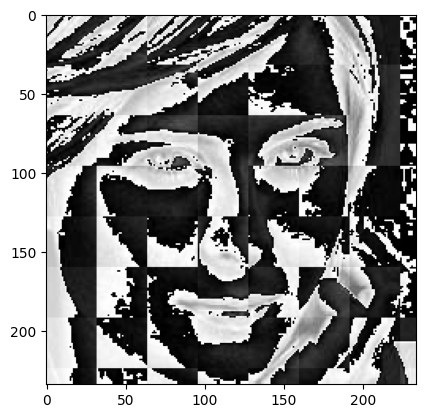

In [71]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap= 'gray')

In [73]:
celebrity_file_name_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [104]:
celebrity_file_name_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list =[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_name_dict[celebrity_name] = file_list

celebrity_file_name_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\

In [106]:
class_dict = {}
count =0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]= count
    count+=1

class_dict
    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [108]:
x=[]
y=[]


for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img= cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [110]:
len(x)
len(y)

159

In [112]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [114]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(159, 4096)

In [116]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [124]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel ='linear', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.775

In [148]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.82      0.82      0.82        11
           2       0.71      0.83      0.77         6
           3       0.40      0.50      0.44         4
           4       1.00      0.82      0.90        11

    accuracy                           0.78        40
   macro avg       0.74      0.74      0.74        40
weighted avg       0.80      0.78      0.78        40



In [134]:
len(x_test)

40

In [150]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [152]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [156]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\

,model,best_score,best_params
0,svm,0.856522,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.755435,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.882246,{'logisticregression__C': 10}


In [158]:
best_estimators['svm'].score(x_test, y_test)

0.775

In [162]:
best_estimators['random_forest'].score(x_test, y_test)

0.6

In [166]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.725

In [186]:
best_clf = best_estimators['svm']

In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[6, 0, 0, 2, 0],
       [1, 9, 1, 0, 0],
       [0, 1, 5, 0, 0],
       [1, 0, 1, 2, 0],
       [0, 1, 0, 1, 9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

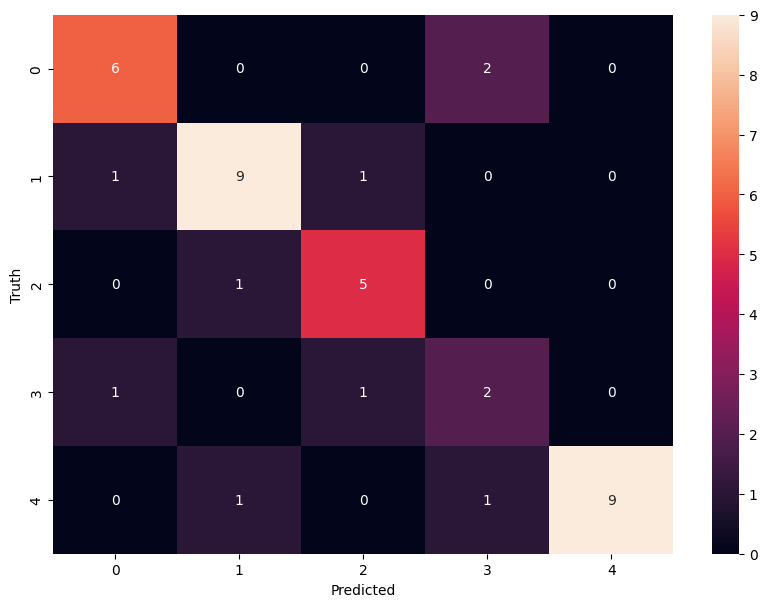

In [190]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [192]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [194]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [196]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))